In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.image as mpimg

from PCA import PCA

In [3]:
raw_country_df = pd.read_csv('data/food-consumption.csv')

In [4]:
drop_indexes = raw_country_df.index[raw_country_df['Country'].isin(['Sweden', 'Finland', 'Spain'])]

In [5]:
raw_country_df = raw_country_df.drop(drop_indexes).reset_index(drop=True)

In [6]:
numpy_data = raw_country_df.to_numpy()

### 2.1

Proof of concept: the first plot below shows the first two columns of the raw data (excluding country name) with each of the principal component's axis displayed as arrows (each of the arrows is weighted by eigenvalue). Visually, the first plot shows that PCA can find the highest variance directions (the direction of PC1 has the most variance, the direction of PC2 has the second most variance).

Below the first plot are two stem plots showing the weight of each feature in respect to the first two principal components. Think of these weights as "how much of the PC does this feature make up."

In [7]:
pca = PCA()

In [8]:
pca.load_data(numpy_data[:, 1:4])

In [9]:
transformed_data = pca.transform_data()

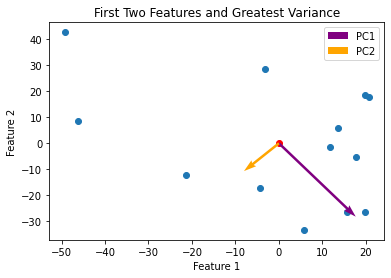

In [10]:
cumulative_eigenvalues = pca.eigenvalues[0] + pca.eigenvalues[1]

plt.scatter(pca.centered_features[:, 0], pca.centered_features[:, 1])
plt.scatter(0, 0, color='red')

plt.quiver(0, 0, pca.eigenvectors[0, 0], pca.eigenvectors[1, 0], color='purple', scale=(pca.eigenvalues[1] / cumulative_eigenvalues) * 10, label='PC1')
plt.quiver(0, 0, pca.eigenvectors[0, 1], pca.eigenvectors[1, 1], color='orange', scale=(pca.eigenvalues[0] / cumulative_eigenvalues) * 10, label='PC2')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('First Two Features and Greatest Variance')

plt.legend()
plt.show()

Below are the two stem plots for PC1 and PC2 after PCA was run on ALL of the data. These plots show component weight for each feature. These weight values are obtained from the first and second eigenvectors, respectively. 

In [11]:
pca = PCA()

In [12]:
pca.load_data(numpy_data[:, 1:])

In [13]:
pca.transform_data()

Text(0, 0.5, 'Weight')

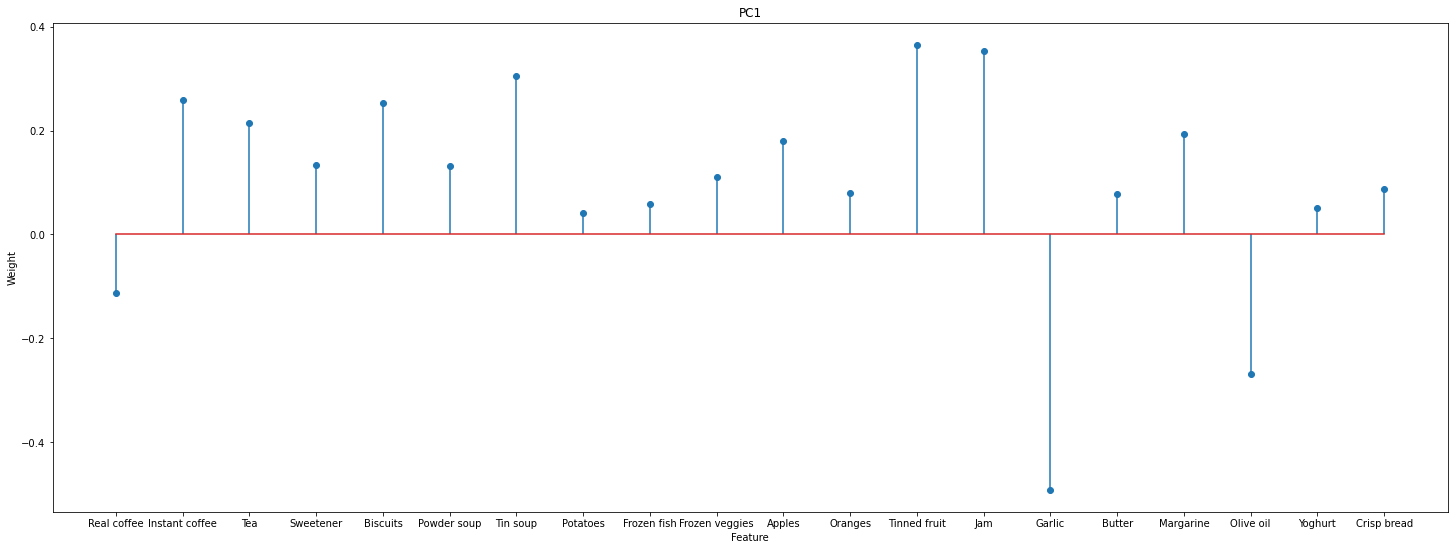

In [14]:
fig = plt.figure(figsize=(25, 9))

plt.stem(raw_country_df.columns[1:], pca.eigenvectors[:, 0], use_line_collection = True)
plt.title('PC1')
plt.xlabel('Feature')
plt.ylabel('Weight')

Text(0, 0.5, 'Weight')

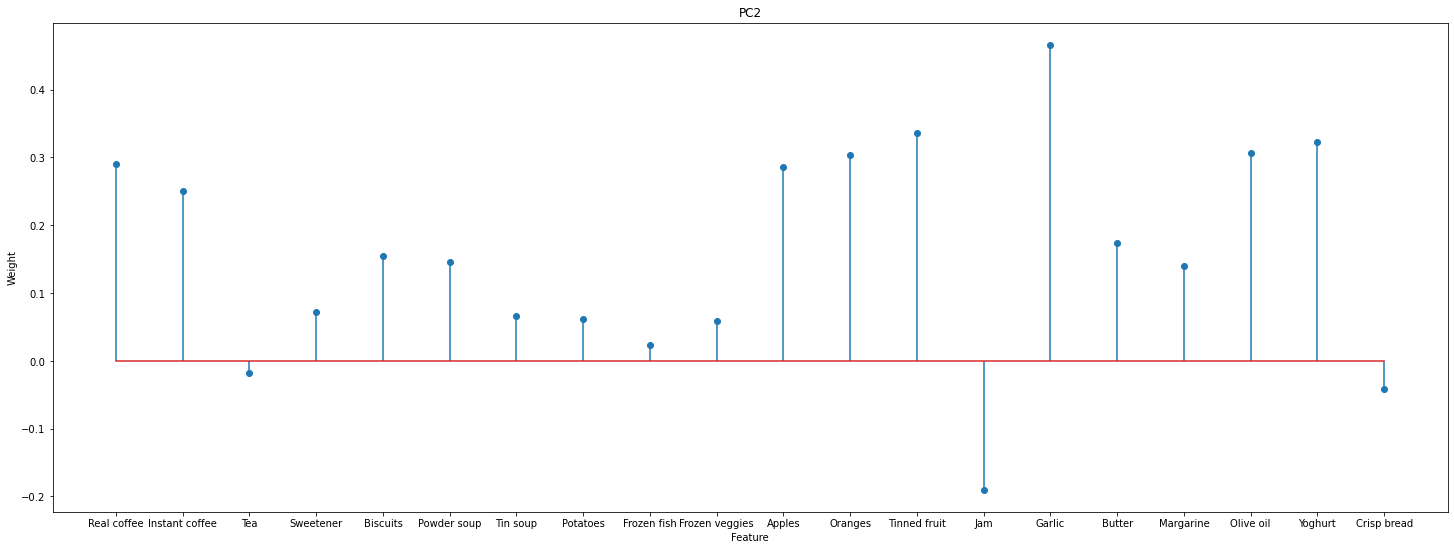

In [15]:
fig = plt.figure(figsize=(25, 9))

plt.stem(raw_country_df.columns[1:], pca.eigenvectors[:, 1], use_line_collection = True)
plt.title('PC2')
plt.xlabel('Feature')
plt.ylabel('Weight')

### 2.2

Interestingly, a few insights were uncovered after running PCA on the full dataset and plotting the projected data onto the new two-dimensional principal component coordinate system. As seen below, I made an arbitrary cut through Europe to dilineate "Latin" countries and "Germanic-nordic" countries. When coloring the data based on this separation, they are very clearly clustered about their respective region. PCA has been able to reduce all of the original features down into two high variance "combination" features that elucidate a particularly interesting aspect of the data.

In [16]:
label_colors = ['blue', 'red', 'red', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'blue', 'blue']
# See picture; broken down by line. 
# Also, broadly, "latin" vs "germanic/nordic" for coloring

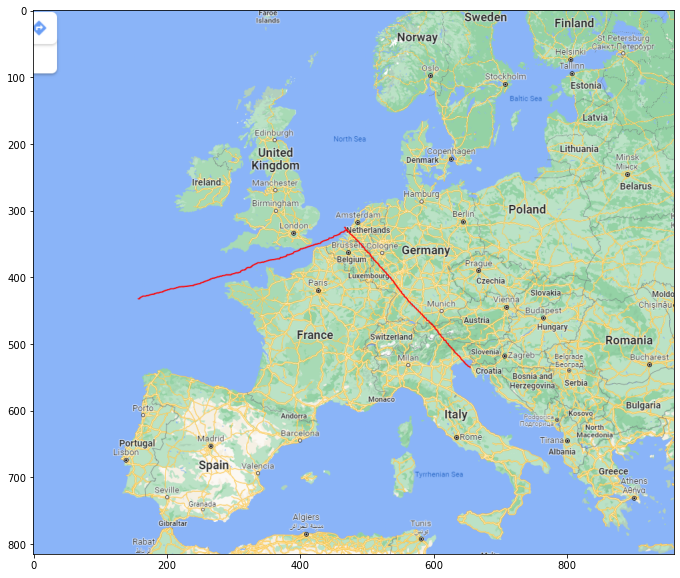

In [17]:
img = mpimg.imread('europe.png')
plt.figure(figsize=(100, 10))
plt.imshow(img)
plt.show()

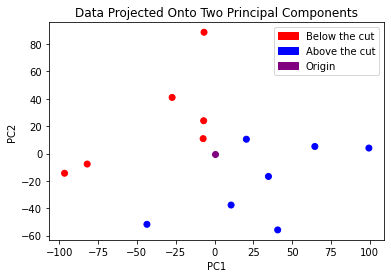

In [18]:
plt.scatter(pca.transformed_data[:, 0], pca.transformed_data[:, 1], color=label_colors)
plt.scatter(0, 0, color='purple')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title('Data Projected Onto Two Principal Components')

blue_patch = mpatches.Patch(color='blue', label='Above the cut')
red_patch = mpatches.Patch(color='red', label='Below the cut')
purple_patch = mpatches.Patch(color='purple', label='Origin')

plt.legend(handles=[red_patch, blue_patch, purple_patch])

plt.show()